In [57]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

x, y = load_digits(return_X_y=True)  #载入数据
x = x.reshape(-1, 8, 8, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=202406)  #划分训练集与测试集
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1437, 8, 8, 1) (360, 8, 8, 1) (1437,) (360,)


In [58]:
from keras.utils import to_categorical

#对标签进行独热编码
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [59]:
from keras import models, layers

#定义网络结构
CNN = models.Sequential()

#定义卷积层
#该有32个3x3的卷积核，步长为1
CNN.add(layers.Convolution2D(input_shape=(8, 8, 1), filters=32, kernel_size=3, strides=1, padding='same',
                             activation='relu'))
#定义池化层
CNN.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
CNN.add(layers.Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
CNN.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
#扁平化
CNN.add(layers.Flatten())
#全连接层
CNN.add(layers.Dense(units=512, activation='relu'))
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Dense(units=10, activation='softmax'))

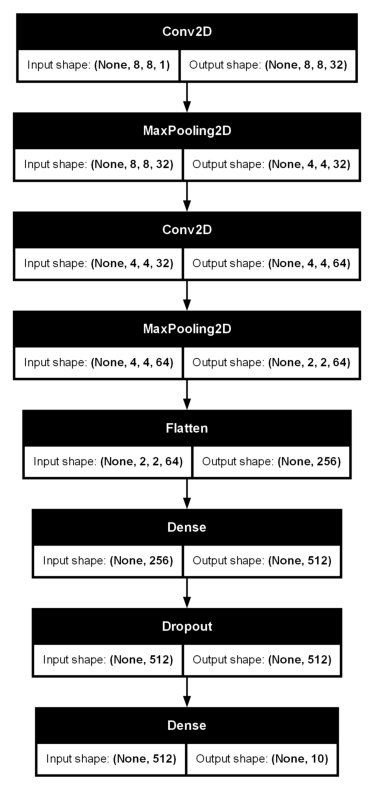

In [60]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#绘制网络结构示意图
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=False, rankdir='TB')
plt.figure(figsize=(10, 10))
img = plt.imread('CNN.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [61]:
from keras.optimizers import Adam

#设置训练参数并进行训练
#设置学习率为0.001
CNN.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#进行20次训练，每批64个数据
CNN.fit(x_train, y_train, epochs=20, batch_size=64)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2729 - loss: 2.3043
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8464 - loss: 0.6093
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9273 - loss: 0.2343
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9544 - loss: 0.1485
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9711 - loss: 0.0961
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0566
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9843 - loss: 0.0592
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9893 - loss: 0.0375
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9925 - loss: 0.0344
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9974 - loss: 0.0184
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0395
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9952 - lo

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

#进行模型评估
train_loss, train_acc = CNN.evaluate(x_train, y_train, batch_size=64)
print(f"训练集损失函数{train_loss:.4f},准确率{train_acc * 100:.2f}%")
test_loss, test_acc = CNN.evaluate(x_test, y_test, batch_size=64)
print(f"测试集损失函数：{test_loss:.4f},准确率：{test_acc * 100:.2f}%")
y_pred = CNN.predict(x_test).argmax(axis=-1)
y_true = y_test.argmax(axis=-1)
print("-----分类报告如下-----")
print(classification_report(y_true, y_pred))
print("混淆矩阵如下")
cm = confusion_matrix(y_true, y_pred)
print(cm)
print("-----网络报告如下-----")
print(CNN.summary())

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.9465e-04 
训练集损失函数0.0008,准确率100.00%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0158 
测试集损失函数：0.0173,准确率：99.44%
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
-----分类报告如下-----
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        35
           4       0.95      1.00      0.97        35
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99     

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,532 (607.55 KB)

 Trainable params: 155,530 (607.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


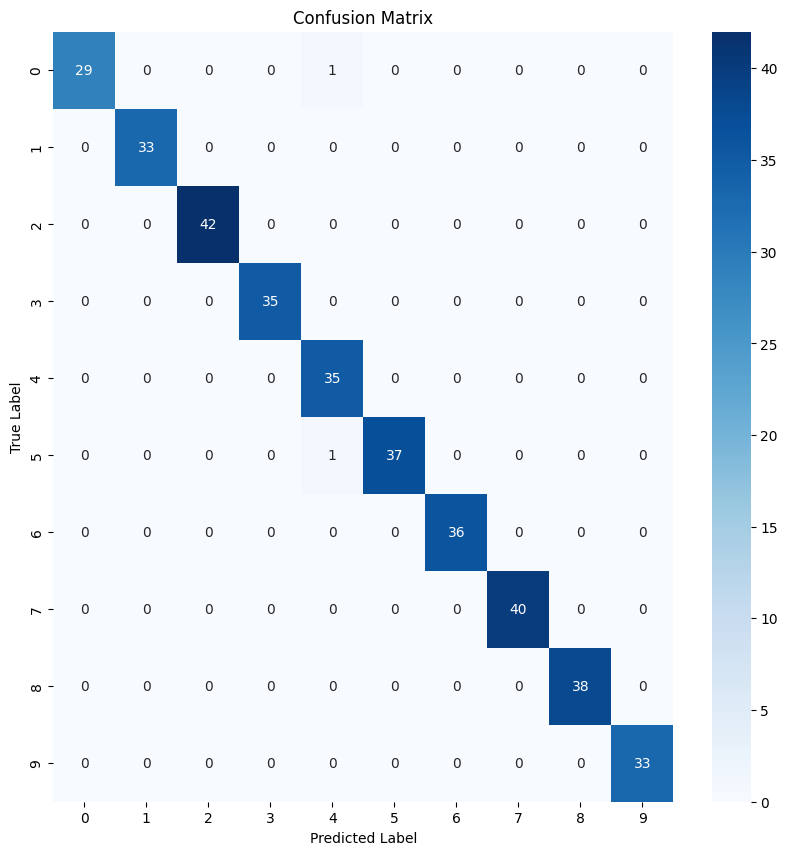

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 绘制混淆矩阵的热力图
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

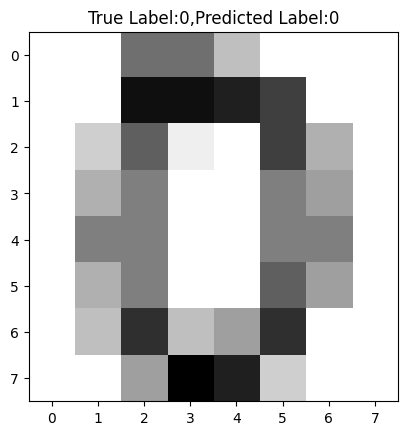

0


In [64]:
import numpy as np

#随机展示一个样例
index = np.random.randint(0, len(x_test))
sample = x_test[index]
sample = sample.reshape(8, 8)
plt.imshow(sample, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"True Label:{y_true[index]},Predicted Label:{y_pred[index]}")
plt.show()
print(np.argmax(y_pred[index]))

In [66]:
#测试完毕，保存网络模型
CNN.save('CNN.h5')